In [1]:
import numpy as np
from scipy.io import wavfile

from scipy import signal
import os
import shutil
import pandas as pd
import pickle

import torch
from torch import nn

import torch.nn.functional as F

import librosa
import matplotlib.pyplot as plt
%matplotlib inline

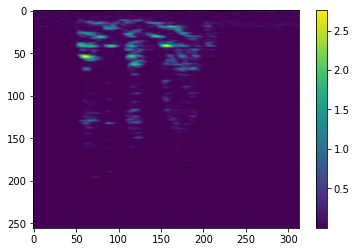

In [2]:
root_path = '/media/mikhail/files/datasets/emotion_recognition/CREMA-D/AudioWAV'
#root_path = '/media/mikhail/files/datasets/emotion_recognition/IEMOCAP/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01'
#root_path = '/media/mikhail/files/datasets/emotion_recognition/RAVDESS/Audio_Speech_Actors_01-24/Actor_01'
paths_to_wavs_list = [os.path.join(root_path, item) for item in os.listdir(root_path) if item.endswith('.wav')]

sr, wav = wavfile.read(paths_to_wavs_list[0])

wav = wav / 32768

wav1, sr1 = librosa.load(paths_to_wavs_list[0])

spectrogram = librosa.feature.melspectrogram(wav, sr=sr, n_fft=2048, hop_length=128, n_mels=256)
spectrogram = np.log10(spectrogram + 1)
plt.imshow(spectrogram)
plt.colorbar()

In [225]:
spectrogram.shape

(256, 313)

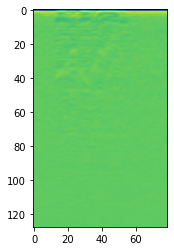

In [5]:
mfcc = librosa.feature.mfcc(wav, sr=sr, n_mfcc=128)
plt.imshow(mfcc)

(257, 313)

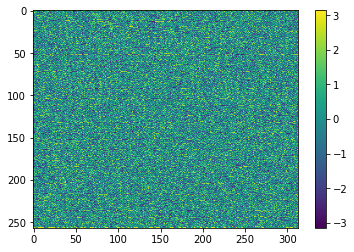

In [76]:
sr, wav = wavfile.read(paths_to_wavs_list[0])

wav = wav / 32768

f, t, Z = signal.stft(x=wav)
Z = librosa.core.stft(wav, n_fft=512)#, hop_length=256)
#power = np.abs(Z)#**2
spect, phase = librosa.magphase(Z)
phase = np.angle(Z)
#plt.imshow(np.log2(np.abs(phase) + 1))
plt.imshow(phase)
plt.colorbar()
power.shape

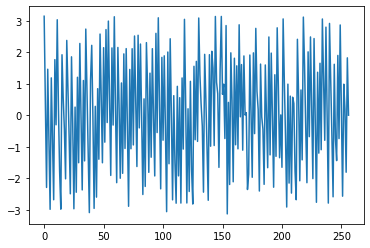

In [82]:
plt.plot(phase[:,-1])

In [120]:
n_fft_list = [i for i in range(1024, 2049, 32)]
for i in range(10000):
    idx = np.random.randint(len(n_fft_list))
    n_fft = n_fft_list[idx]

In [118]:
i

23

In [112]:
n_fft_list[-1]

2048

In [123]:
Z.shape

(128, 157)

In [124]:
sr

16000

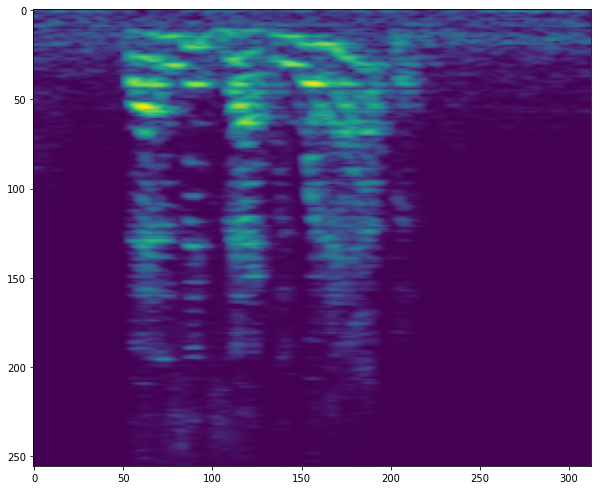

In [57]:
sr, wav = wavfile.read(paths_to_wavs_list[0])

wav = wav / 32768

f, t, Z = signal.stft(x=wav)
Z = librosa.feature.melspectrogram(wav, sr=sr, n_fft=2048, n_mels=256, hop_length=128)
#power = np.abs(Z)#**2
plt.figure(figsize=(10,10))
plt.imshow(np.log2(Z + 0.005))
#plt.imshow(Z)
spect, phase = librosa.magphase(Z)

(129, 314)

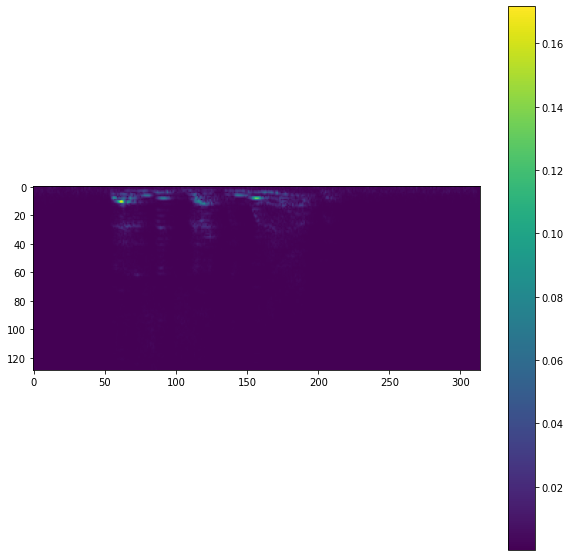

In [68]:
sr, wav = wavfile.read(paths_to_wavs_list[0])

wav = wav / 32768

f, t, Z = signal.stft(x=wav)
#Z = librosa.feature.melspectrogram(wav, sr=sr, n_fft=2048, n_mels=256, hop_length=128)
#power = np.abs(Z)#**2
spect, phase = librosa.magphase(Z)
plt.figure(figsize=(10,10))
plt.imshow(np.log2(spect + 1))
#plt.imshow(np.abs(phase))
plt.colorbar()
#plt.imshow(Z)
phase.shape

In [69]:
np.abs(phase).mean()

1.0

In [50]:
sr

16000

In [51]:
20/1000*16000

320.0

In [ ]:
40000

In [25]:
power.shape

(257, 313)

In [123]:
mfcc = librosa.feature.mfcc(wav, sr=sr, n_mfcc=256, n_mels=256)
mfcc.shape

(256, 79)

In [104]:
power.shape

(1025, 79)

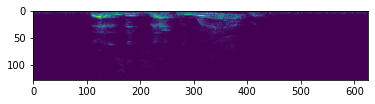

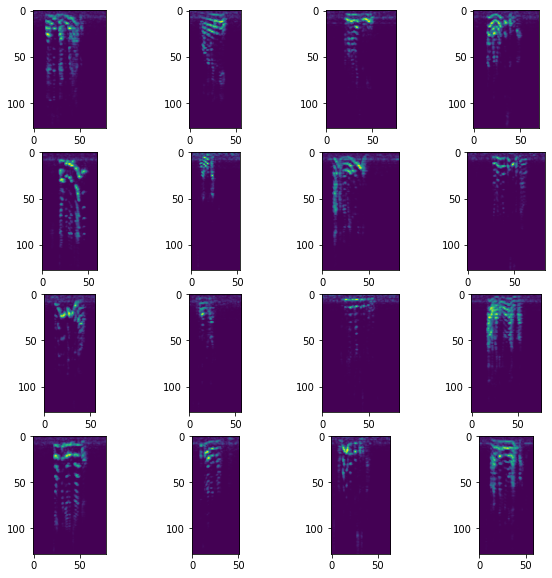

In [67]:
# select 10 samples with the same emotion
target = 'HAP'

cnt = 0
target_paths_list = []
for path in paths_to_wavs_list:
    name = os.path.split(path)[1][:-4]
    emotion_class = name.split('_')[2]
    if emotion_class == target:
        target_paths_list.append(path)

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))

for i in range(4):
    for j in range(4):
        sr, wav = wavfile.read(target_paths_list[i*4+j])
        wav = wav / 32768
        spectrogram = librosa.feature.melspectrogram(wav, sr=sr, n_mels=128)
        spectrogram = np.log(spectrogram + 0.1)

        axs[i, j].imshow(spectrogram)

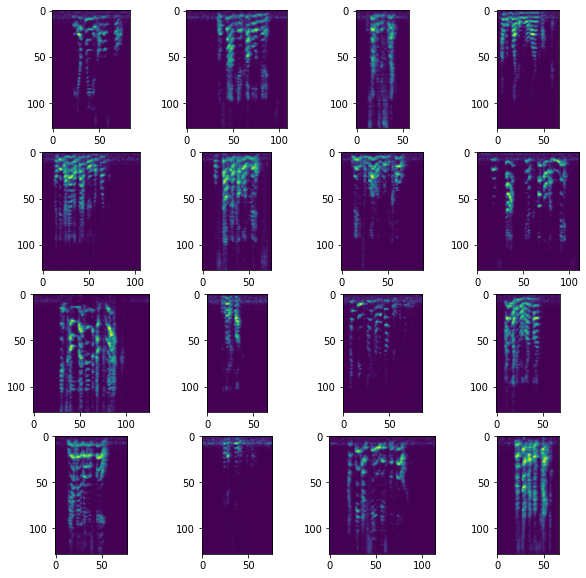

In [68]:
# select 10 samples with the same emotion
target = 'ANG'

cnt = 0
target_paths_list = []
for path in paths_to_wavs_list:
    name = os.path.split(path)[1][:-4]
    emotion_class = name.split('_')[2]
    if emotion_class == target:
        target_paths_list.append(path)

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))

for i in range(4):
    for j in range(4):
        sr, wav = wavfile.read(target_paths_list[i*4+j])
        wav = wav / 32768
        spectrogram = librosa.feature.melspectrogram(wav, sr=sr, n_mels=128)
        spectrogram = np.log(spectrogram + 0.1)

        axs[i, j].imshow(spectrogram)

In [72]:
wav, sr = torchaudio.load(paths_to_wavs_list[0])

In [76]:
wav.shape

torch.Size([1, 40040])

In [35]:
(wav/32768).max()

0.4400634765625

In [40]:
wav1.shape

(55181,)

In [39]:
sr

22050

In [48]:
path_to_csv = os.path.join('/media/mikhail/files/datasets/emotion_recognition/CREMA-D', 'VideoDemographics.csv')
demographic_info = pd.read_csv(path_to_csv)

target_path = '/media/mikhail/files/datasets/emotion_recognition/CREMA-D/AudioWAV'
l = os.listdir(target_path)
l[0]

'1042_TIE_HAP_XX.wav'

In [78]:
gender = demographic_info[['ActorID','Sex']]
a = gender[gender['ActorID'] == 1002]['Sex'].values[0]

In [220]:
tensor = torch.cat([torch.ones((4, 2)), torch.ones((4, 2))+1, torch.ones((4, 2))+2]).unsqueeze(0).unsqueeze(0)
rows = 3
cols = 2
tensor.view(tensor.size(0), tensor.size(1), rows, cols, -1)

tensor([[[[[1., 1., 1., 1.],
           [1., 1., 1., 1.]],

          [[2., 2., 2., 2.],
           [2., 2., 2., 2.]],

          [[3., 3., 3., 3.],
           [3., 3., 3., 3.]]]]])

In [238]:
tensor = torch.arange(24).view(12, 2).unsqueeze(0).unsqueeze(0)
print(tensor)
tensor[:,:,:2,:]

tensor([[[[ 0,  1],
          [ 2,  3],
          [ 4,  5],
          [ 6,  7],
          [ 8,  9],
          [10, 11],
          [12, 13],
          [14, 15],
          [16, 17],
          [18, 19],
          [20, 21],
          [22, 23]]]])


tensor([[[[0, 1],
          [2, 3]]]])

In [261]:
class conv_block(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_block = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True),

            nn.Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=(2, 2)),

            nn.Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),

            nn.Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=(2, 2)),
        )
    def forward(self, x):
        return self.conv_block(x)

class test_module(nn.Module):
    def __init__(self):
        super().__init__()

        self.num_strides = 4

        self.conv_list = [conv_block() for i in range(self.num_strides)]

    def forward(self, x):
        results = []
        rows = x.size(2)
        cols = x.size(3)
        stride_len = cols//self.num_strides
        print(stride_len)
        for idx, conv_block in enumerate(self.conv_list):
            results.append(conv_block(x[:,:,idx*stride_len:idx*stride_len+stride_len,:]))

        #return torch.cat(results, dim=1)
        return results


In [262]:
#tensor = torch.arange(24).view(12, 2).unsqueeze(0).unsqueeze(0)
tensor = torch.randn((1, 1, 256, 256))

model = test_module()

model(tensor)[0].shape

64


torch.Size([1, 32, 16, 64])

In [212]:
arr = np.concatenate([np.ones((4, 2)), np.ones((4, 2))+1, np.ones((4, 2))+2],axis=1)
#arr.transpose().reshape(3, 1, 4, 2)
arr

array([[1., 1., 2., 2., 3., 3.],
       [1., 1., 2., 2., 3., 3.],
       [1., 1., 2., 2., 3., 3.],
       [1., 1., 2., 2., 3., 3.]])

In [296]:
spect, phase = librosa.magphase(D)

array([1., 1., 1., 1.])

In [56]:
conv = nn.Conv2d(1, 8, (3, 3), padding=1)
arr = torch.cat([torch.ones((4, 3)), torch.ones((4, 3))+1, torch.ones((4, 3))+2], dim=1)
arr = arr.transpose(1, 0).reshape(1, 3, 1, 4, 3)
print(arr.shape)
#conv(arr).shape

torch.Size([1, 3, 1, 4, 3])


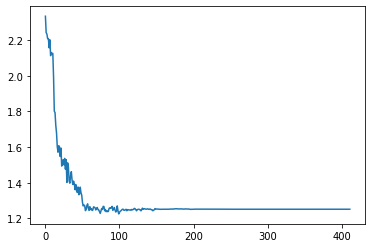

In [6]:
with open('CREMA_log_pow_spec_norm_alexnet_lr_decay/CREMA_log_pow_spec_norm_alexnet_lr_decay_val_loss.pkl', 'rb') as f:
    l = pickle.load(f)

plt.plot(l)

In [118]:
a = torch.randn((28, 28))#.cuda(device='cuda:0')
F.softmax(a).shape

torch.Size([28, 28])

In [116]:
a.device

device(type='cpu')

In [203]:
recurrent_model = nn.LSTM

input_dim = 128
hidden_dim = 64
layer_num = 1
seq_len = 32

batch_size = 16

bidirectional = False

if bidirectional:
    num_directions = 2
else:
    num_directions = 1

rnn = recurrent_model(
    input_size=input_dim,
    hidden_size=hidden_dim,
    num_layers=layer_num,
    batch_first=False,
    bidirectional=bidirectional,
    dropout=0.5).cpu()

attn = nn.Linear(in_features=hidden_dim, out_features=1)

hidden0 = torch.zeros(num_directions * layer_num, batch_size, hidden_dim).cpu()
cell0 = torch.zeros(num_directions * layer_num, batch_size, hidden_dim).cpu()

data = torch.randn((seq_len, batch_size, input_dim)).cpu()

output, (hidden, cell) = rnn(data, (hidden0, cell0))

output = output.transpose(1, 0).contiguous()

# compute alpha coefficients
alphas = F.softmax(attn(output), dim=1)

batch_size = output.size(0)
seq_len = output.size(1)
hidden_dim = output.size(2)

# AAAAAAAAAAAAAAAAAAAAAAAAA
# multiply the outputs by the alphas
# outputs have size [batch_size, sequence_len, hidden_dim]
# reshape them to [batch_size * sequence_len, hidden_dim, 1]
# and multiply the by alphas of shape [batch_size * sequence_len, 1, 1]
intermediate = torch.bmm(
    output.view(batch_size*seq_len, hidden_dim, 1),
    alphas..view(batch_size*seq_len, 1, 1)
    )
intermediate = intermediate.view(batch_size, seq_len, -1).sum(dim=1)

In [204]:
intermediate.shape

torch.Size([16, 64])

In [180]:
output.reshape(output.size(0)*output.size(1), output.size(2), 1).shape

torch.Size([512, 64, 1])

In [192]:
output.shape

torch.Size([16, 32, 64])

In [43]:
F.softmax(attn(output.transpose(1, 0)), dim=1).shape

torch.Size([16, 32, 1])

In [207]:
class audio_rnn(nn.Module):
    def __init__(self, rnn, layer_num, input_dim, hidden_dim, class_num, device, bidirectional=False):
        super().__init__()

        self.layer_num = layer_num
        self.hidden_dim = hidden_dim
        self.device = device
        
        if bidirectional:
            self.num_directions = 2
        else:
            self.num_directions = 1
       
        self.rnn = rnn(input_size=input_dim,
                        hidden_size=hidden_dim,
                        num_layers=layer_num,
                        batch_first=False,
                        bidirectional=bidirectional,
                        dropout=0.5)
        
        # Bidirectional nns has twice large inputs size on Linear layer
        if bidirectional:
            self.fc = nn.Linear(in_features=hidden_dim * self.num_directions, out_features=class_num)
        else:
            self.fc = nn.Linear(in_features=hidden_dim, out_features=class_num)        

    def init_hidden(self, batch_size):
        hidden = torch.zeros(self.num_directions * self.layer_num, batch_size, self.hidden_dim).to(self.device)
        cell = torch.zeros(self.num_directions * self.layer_num, batch_size, self.hidden_dim).to(self.device)
        return (hidden, cell)

    def compute_output(self, output):
        if self.num_directions == 2:
            # Если рекуррентная сеть является двунаправленной, то на выходной классификатор надо
            # подавать выход последнего шага рекуррентной сети прямого прохода - output[-1,:,size//2:],
            # а также выход последнего шага рекуррентной сети обратного прохода - output[1,:,:size//2]
            size = output.size(2)
            result = self.fc(torch.cat([output[1,:,:size//2], output[-1,:,size//2:]], dim=1))
        else:
            result = self.fc(output[-1])

        return result
    
    def forward(self, batch):
        batch_size = batch.shape[0]

        batch = batch.transpose(1, 0)

            

        h0, c0 = self.init_hidden(batch_size=batch_size)

        #print('h0 shape =', h0.shape)
        
        #return h0, c0

        # GRU don't has memory cell
        # We need to initialize only hidden states h
        if isinstance(self.rnn, nn.GRU):
            output, hn = self.rnn(batch, h0)
        elif isinstance(self.rnn, nn.LSTM):
            output, (hn, cn) = self.rnn(batch, (h0, c0))
        else:
            raise ValueError('self.rnn shoulb be torch.nn.LSTM or torch.nn.GRU')

        #return output

        result = self.compute_output(output)

        return result

class audio_rnn_avg(audio_rnn):
    def compute_output(self, output):
        output = output.mean(dim=0)
        result = self.fc(output)

        return result

class audio_rnn_attention(audio_rnn):
    def __init__(self, rnn, layer_num, input_dim, hidden_dim, class_num, device, bidirectional=False):
        super().__init__(rnn, layer_num, input_dim, hidden_dim, class_num, device, bidirectional=False)
        self.attention = nn.Linear(in_features=hidden_dim, out_features=1)
    
    def compute_output(self, x):
        x = x.transpose(1, 0).contiguous()

        batch_size = x.size(0)
        seq_len = x.size(1)
        hidden_dim = x.size(2)

        # compute alpha coefficients of attention module
        alphas = F.softmax(self.atention(x), dim=1)

        # AAAAAAAAAAAAAAAAAAAAAAAAA
        # multiply the outputs by the alphas
        # outputs have size [batch_size, sequence_len, hidden_dim]
        # reshape them to [batch_size * sequence_len, hidden_dim, 1]
        # and multiply the by alphas of shape [batch_size * sequence_len, 1, 1]
        intermediate = torch.bmm(
            x.view(batch_size*seq_len, hidden_dim, 1),
            alphas.view(batch_size*seq_len, 1, 1)
            )
        intermediate = intermediate.view(batch_size, seq_len, -1).sum(dim=1)

        output = self.fc(intermediate)

        return output

In [183]:
out = out.unsqueeze(-1)
out.shape

torch.Size([2, 8, 1, 1])

In [184]:
data = data.unsqueeze(-1)
data.shape

torch.Size([2, 8, 4, 1])

In [186]:
torch.bmm(data.view(data.size(0)*data.size(1), 4, 1), out.view(16, 1, 1)).view(2, 8, 4)

tensor([[[0.0000e+00, 6.0000e+00, 1.2000e+01, 1.8000e+01],
         [8.8000e+01, 1.1000e+02, 1.3200e+02, 1.5400e+02],
         [3.0400e+02, 3.4200e+02, 3.8000e+02, 4.1800e+02],
         [6.4800e+02, 7.0200e+02, 7.5600e+02, 8.1000e+02],
         [1.1200e+03, 1.1900e+03, 1.2600e+03, 1.3300e+03],
         [1.7200e+03, 1.8060e+03, 1.8920e+03, 1.9780e+03],
         [2.4480e+03, 2.5500e+03, 2.6520e+03, 2.7540e+03],
         [3.3040e+03, 3.4220e+03, 3.5400e+03, 3.6580e+03]],

        [[4.2880e+03, 4.4220e+03, 4.5560e+03, 4.6900e+03],
         [5.4000e+03, 5.5500e+03, 5.7000e+03, 5.8500e+03],
         [6.6400e+03, 6.8060e+03, 6.9720e+03, 7.1380e+03],
         [8.0080e+03, 8.1900e+03, 8.3720e+03, 8.5540e+03],
         [9.5040e+03, 9.7020e+03, 9.9000e+03, 1.0098e+04],
         [1.1128e+04, 1.1342e+04, 1.1556e+04, 1.1770e+04],
         [1.2880e+04, 1.3110e+04, 1.3340e+04, 1.3570e+04],
         [1.4760e+04, 1.5006e+04, 1.5252e+04, 1.5498e+04]]],
       grad_fn=<ViewBackward>)

In [135]:
a = torch.ones((3, 4, 1))
b = torch.ones((3, 1, 1))

c = torch.bmm(a, b)

c

tensor([[[1.],
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         [1.]]])

In [156]:
data

tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.],
         [20., 21., 22., 23.],
         [24., 25., 26., 27.],
         [28., 29., 30., 31.]],

        [[32., 33., 34., 35.],
         [36., 37., 38., 39.],
         [40., 41., 42., 43.],
         [44., 45., 46., 47.],
         [48., 49., 50., 51.],
         [52., 53., 54., 55.],
         [56., 57., 58., 59.],
         [60., 61., 62., 63.]]])